Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
- масштабирование признаков (не менее чем тремя способами);
- обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
- обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
- отбор признаков:
  - один метод из группы методов фильтрации (filter methods);
  - один метод из группы методов обертывания (wrapper methods);
  - один метод из группы методов вложений (embedded methods).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.linear_model import Lasso

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/cleaned_data_airplanes.csv')
data.head()

In [ ]:
data = data.drop(['Range N.M._log', 'Range N.M._reciprocal',
       'Range N.M._sqr', 'Range N.M._exp1', 'Range N.M._exp2',
       'Range N.M._exp3', 'Range N.M._exp4', 'Range N.M._boxcox', 'row_num'], axis = 1)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    615 non-null    object 
 1   Company                  615 non-null    object 
 2   Engine Type              615 non-null    object 
 3   HP or lbs thr ea engine  615 non-null    object 
 4   Max speed Knots          615 non-null    object 
 5   Rcmnd cruise Knots       615 non-null    float64
 6   Stall Knots dirty        615 non-null    float64
 7   All eng rate of climb    615 non-null    object 
 8   Gross weight lbs         615 non-null    object 
 9   Empty weight lbs         615 non-null    float64
 10  Length ft/in             615 non-null    object 
 11  Height ft/in             615 non-null    object 
 12  Wing span ft/in          615 non-null    object 
 13  Range N.M.               615 non-null    float64
 14  Fuel gal/lbs             6

# Масштабирование признаков

In [ ]:
data.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Empty weight lbs,Range N.M.,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,188.463415,59.522764,3740.845528,844.317073,969.855285,22339.172498,1885.274992,1326.571227,1625.115080,956.828327
std,94.197666,15.379890,4730.516496,580.736182,3417.343626,9283.043660,1008.623605,968.554768,657.467251,619.828576
min,65.000000,27.000000,200.000000,117.000000,9.000000,850.000000,350.000000,150.000000,350.000000,200.000000
25%,124.000000,50.000000,1536.000000,511.500000,49.000000,15544.000000,1272.500000,800.000000,1200.000000,595.000000
50%,165.000000,56.000000,2189.000000,690.000000,87.000000,19800.000000,1595.000000,1000.000000,1450.000000,735.000000
75%,212.500000,70.000000,4229.000000,1000.000000,175.000000,27000.000000,2105.500000,1445.000000,1880.000000,1097.500000
max,476.000000,115.000000,42500.000000,4420.000000,29500.000000,51000.000000,6400.000000,5784.323900,4850.000000,3500.000000


In [ ]:
cols_integer = []
cols_string = []
for col in data.columns:
  try:
    data[col] = data[col].astype(float)
    print(f'{col} : Success')
    cols_integer.append(col)
  except Exception as e:
    print(f'{col} : {repr(e)}')
    cols_string.append(col)
    continue

Model : ValueError("could not convert string to float: '15 AC Sedan'")
Company : ValueError("could not convert string to float: 'Aeronca'")
Engine Type : ValueError("could not convert string to float: 'Piston'")
HP or lbs thr ea engine : ValueError("could not convert string to float: '1000 dry'")
Max speed Knots : ValueError("could not convert string to float: '.85 Mach'")
Rcmnd cruise Knots : Success
Stall Knots dirty : Success
All eng rate of climb : ValueError("could not convert string to float: '1,030 w/3bld'")
Gross weight lbs : ValueError("could not convert string to float: 'Orig'")
Empty weight lbs : Success
Length ft/in : ValueError("could not convert string to float: '25/3'")
Height ft/in : ValueError("could not convert string to float: '10/3'")
Wing span ft/in : ValueError("could not convert string to float: '37/5'")
Range N.M. : Success
Fuel gal/lbs : Success
All eng service ceiling : Success
Takeoff over 50ft : Success
Takeoff ground run : Success
Landing over 50ft : Succes

In [ ]:
cols_string.append('Range N.M.')

In [ ]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop(cols_string, axis=1)

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Range N.M.'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((492, 9), (123, 9))

## Масштабирование данных на основе Z-оценки

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,Rcmnd cruise Knots,Stall Knots dirty,Empty weight lbs,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
0,-1.035511,-0.879965,-0.541787,-0.273492,-1.006865,-0.977646,-0.323314,-0.494899,-0.620227
1,-1.120508,-1.010111,-0.617950,-0.279642,-1.082333,-1.156252,-0.433211,-1.256012,-0.676852
2,-1.173631,-1.465622,-0.620066,-0.278470,-0.683432,-1.399355,-0.263371,-1.179901,-0.520921
3,-1.173631,-1.465622,-0.622181,-0.278470,-1.006865,-1.374549,-0.274437,-1.179901,-0.458425
4,-1.216130,-1.725913,-0.634875,-0.279935,-1.060771,-1.243571,-0.347055,-1.126623,-0.631688
...,...,...,...,...,...,...,...,...,...
610,0.016326,-0.359382,0.108777,-0.238348,0.017339,-0.670046,-0.368447,-0.723233,-0.148272
611,-0.111170,-0.294309,0.023093,-0.238348,0.017339,-0.630356,-0.337448,-0.418787,-0.011025
612,-0.185542,-0.489528,0.012515,-0.240105,0.179055,-0.779195,-0.389114,-0.875455,-0.091759
613,-0.769896,-0.945038,-0.542844,-0.274370,-0.036567,-0.617056,-0.527373,-0.619816,-0.517564


In [ ]:
data_cs11_scaled.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Empty weight lbs,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
count,6.150000e+02,6.150000e+02,6.150000e+02,6.150000e+02,615.000000,6.150000e+02,6.150000e+02,6.150000e+02,6.150000e+02
mean,-1.657211e-16,-3.610481e-19,-1.552507e-17,-1.213122e-16,0.000000,-1.686095e-16,7.726430e-17,-4.123170e-16,2.229472e-16
std,1.000814e+00,1.000814e+00,1.000814e+00,1.000814e+00,1.000814,1.000814e+00,1.000814e+00,1.000814e+00,1.000814e+00
min,-1.311751e+00,-2.116351e+00,-7.491207e-01,-2.813991e-01,-2.316769,-1.523388e+00,-1.215759e+00,-1.941014e+00,-1.222022e+00
25%,-6.848990e-01,-6.196739e-01,-4.664692e-01,-2.696846e-01,-0.732594,-6.080304e-01,-5.441095e-01,-6.471214e-01,-5.842307e-01
50%,-2.492898e-01,-2.292365e-01,-3.283169e-01,-2.585558e-01,-0.273751,-2.880274e-01,-3.374482e-01,-2.665648e-01,-3.581779e-01
75%,2.553795e-01,6.817841e-01,1.032766e-01,-2.327838e-01,0.502488,2.185198e-01,1.223732e-01,3.879926e-01,2.271373e-01
max,3.054966e+00,3.610064e+00,8.200099e+00,8.355428e+00,3.089952,4.479768e+00,4.606225e+00,4.909005e+00,4.106364e+00


In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

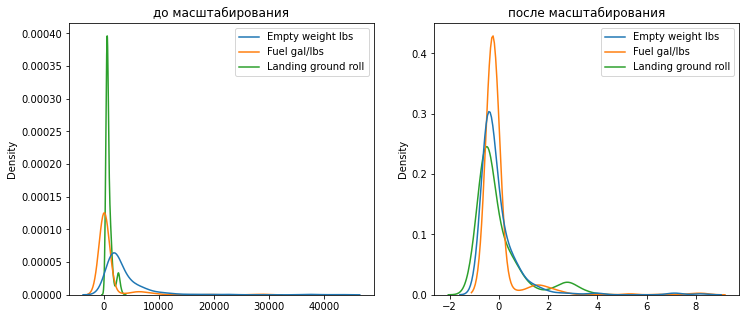

In [ ]:
draw_kde(['Empty weight lbs', 'Fuel gal/lbs', 'Landing ground roll'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [ ]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [ ]:
data_cs12_scaled_train.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Empty weight lbs,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
count,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02
mean,-8.168714e-17,-1.629230e-16,3.159171e-18,-2.346813e-17,1.085401e-16,-1.841346e-16,3.159171e-17,-1.214024e-16,-6.634260e-17
std,1.001018e+00,1.001018e+00,1.001018e+00,1.001018e+00,1.001018e+00,1.001018e+00,1.001018e+00,1.001018e+00,1.001018e+00
min,-1.235814e+00,-2.089996e+00,-7.227436e-01,-2.900332e-01,-1.678905e+00,-1.516499e+00,-1.200183e+00,-1.933134e+00,-1.202790e+00
25%,-6.893439e-01,-6.286969e-01,-4.615388e-01,-2.799946e-01,-7.287980e-01,-6.176086e-01,-5.581734e-01,-6.577215e-01,-5.924388e-01
50%,-2.597929e-01,-2.474885e-01,-3.295849e-01,-2.696848e-01,-2.943139e-01,-3.066386e-01,-3.606322e-01,-2.567717e-01,-3.761118e-01
75%,2.383846e-01,7.055326e-01,7.350110e-02,-2.445886e-01,4.778114e-01,2.276166e-01,9.149036e-02,3.326207e-01,2.110615e-01
max,2.891942e+00,3.501061e+00,7.592563e+00,7.710115e+00,2.980021e+00,4.281248e+00,4.364875e+00,4.730850e+00,3.896347e+00


In [ ]:
data_cs12_scaled_test.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Empty weight lbs,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,-0.157049,-0.118353,-0.133432,-0.152139,-0.103116,-0.226184,-0.190379,-0.224174,-0.166721
std,0.750540,0.872584,0.552249,0.524295,0.844060,0.792378,0.737468,0.835209,0.749226
min,-1.286649,-1.708787,-0.628386,-0.291118,-2.270431,-1.492541,-1.052027,-1.896112,-1.063723
25%,-0.625801,-0.628697,-0.451464,-0.281351,-0.732044,-0.658816,-0.558173,-0.748426,-0.600165
50%,-0.330961,-0.247488,-0.355140,-0.273212,-0.265523,-0.376480,-0.390263,-0.452249,-0.397744
75%,0.111298,0.483161,0.017476,-0.250015,0.451638,-0.067541,-0.066296,0.311148,0.087446
max,2.546268,2.484505,3.385765,3.917187,2.351851,3.179197,3.987633,2.054890,2.989015


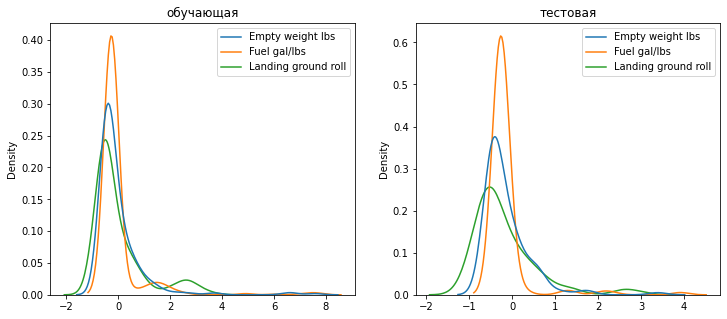

In [ ]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['Empty weight lbs', 'Fuel gal/lbs', 'Landing ground roll'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

## Масштабирование "Mean Normalisation"

In [ ]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [ ]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Empty weight lbs,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,-0.007609,-0.004234,-0.003209,-0.003803,-0.004427,-0.007802,-0.006842,-0.006728,-0.006539
std,0.232014,0.174771,0.111833,0.115893,0.208608,0.166715,0.171903,0.146104,0.187827
min,-0.311707,-0.373811,-0.086917,-0.036389,-0.487329,-0.261567,-0.215664,-0.290087,-0.235881
25%,-0.166386,-0.112447,-0.055333,-0.035033,-0.157127,-0.109088,-0.100300,-0.101198,-0.116184
50%,-0.065401,-0.044265,-0.039896,-0.033744,-0.061487,-0.055782,-0.064803,-0.045642,-0.073760
75%,0.051594,0.114826,0.008331,-0.030760,0.100311,0.028598,0.014177,0.049913,0.036089
max,0.700609,0.626189,0.913083,0.963747,0.639637,0.738433,0.784336,0.709913,0.764119


In [ ]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [ ]:
data_cs22_scaled_train.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Empty weight lbs,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
count,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02,4.920000e+02
mean,-2.414509e-17,-3.384826e-17,-7.361997e-18,-1.678310e-18,1.796214e-16,4.456688e-18,-7.689197e-17,8.106659e-17,5.573681e-17
std,2.425089e-01,1.790391e-01,1.203825e-01,1.251249e-01,2.148602e-01,1.726563e-01,1.798756e-01,1.502131e-01,1.963112e-01
min,-2.993912e-01,-3.738105e-01,-8.691725e-02,-3.625347e-02,-3.603631e-01,-2.615669e-01,-2.156640e-01,-2.900868e-01,-2.358811e-01
25%,-1.670021e-01,-1.124469e-01,-5.550472e-02,-3.499868e-02,-1.564305e-01,-1.065256e-01,-1.002997e-01,-9.869793e-02,-1.161841e-01
50%,-6.293804e-02,-4.426506e-02,-3.963592e-02,-3.370998e-02,-6.317206e-02,-5.288926e-02,-6.480296e-02,-3.853126e-02,-7.375989e-02
75%,5.775161e-02,1.261895e-01,8.839253e-03,-3.057300e-02,1.025583e-01,3.925950e-02,1.644015e-02,4.991318e-02,4.139162e-02
max,7.006088e-01,6.261895e-01,9.130828e-01,9.637465e-01,6.396369e-01,7.384331e-01,7.843360e-01,7.099132e-01,7.641189e-01


In [ ]:
data_cs22_scaled_test.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Empty weight lbs,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,-0.038047,-0.021168,-0.016047,-0.019017,-0.022133,-0.039012,-0.034210,-0.033640,-0.032696
std,0.181828,0.156068,0.066414,0.065536,0.181170,0.136670,0.132518,0.125332,0.146932
min,-0.311707,-0.305629,-0.075570,-0.036389,-0.487329,-0.257435,-0.189041,-0.284531,-0.208608
25%,-0.151608,-0.112447,-0.054293,-0.035168,-0.157127,-0.113633,-0.100300,-0.112309,-0.117699
50%,-0.080179,-0.044265,-0.042709,-0.034151,-0.056992,-0.064936,-0.070127,-0.067865,-0.078002
75%,0.026963,0.086417,0.002102,-0.031251,0.096940,-0.011650,-0.011913,0.046691,0.017149
max,0.616865,0.444371,0.407173,0.489639,0.504805,0.548350,0.716548,0.308358,0.586181


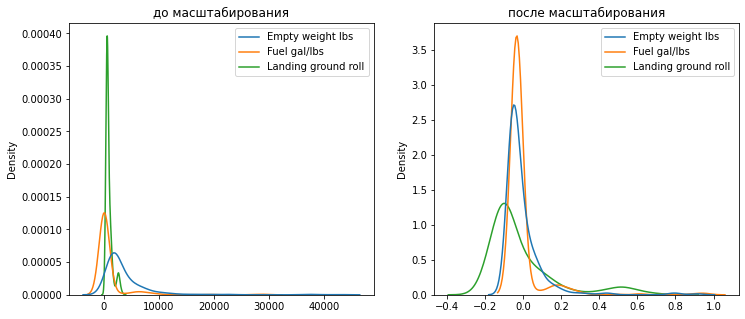

In [ ]:
draw_kde(['Empty weight lbs', 'Fuel gal/lbs', 'Landing ground roll'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

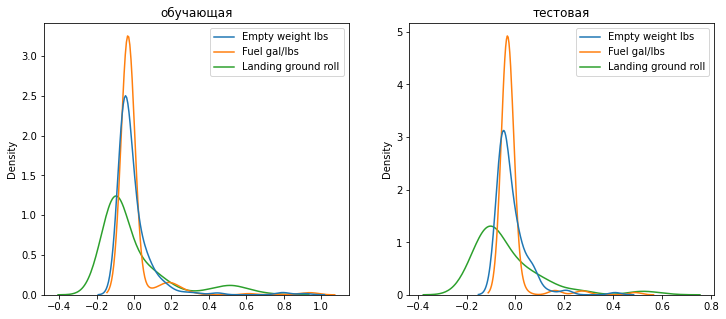

In [ ]:
draw_kde(['Empty weight lbs', 'Fuel gal/lbs', 'Landing ground roll'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

## MinMax-масштабирование

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Empty weight lbs,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.300398,0.369577,0.083708,0.032581,0.428498,0.253764,0.208822,0.283359,0.229342
std,0.229191,0.174771,0.111833,0.115878,0.185106,0.166715,0.171903,0.146104,0.187827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.143552,0.261364,0.031584,0.001356,0.293001,0.152479,0.115364,0.188889,0.119697
50%,0.243309,0.329545,0.047021,0.002645,0.377866,0.205785,0.150861,0.244444,0.162121
75%,0.358881,0.488636,0.095248,0.005629,0.521436,0.290165,0.229841,0.340000,0.271970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

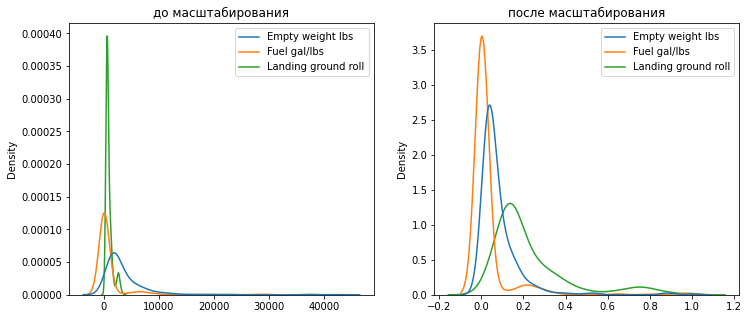

In [ ]:
draw_kde(['Empty weight lbs', 'Fuel gal/lbs', 'Landing ground roll'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

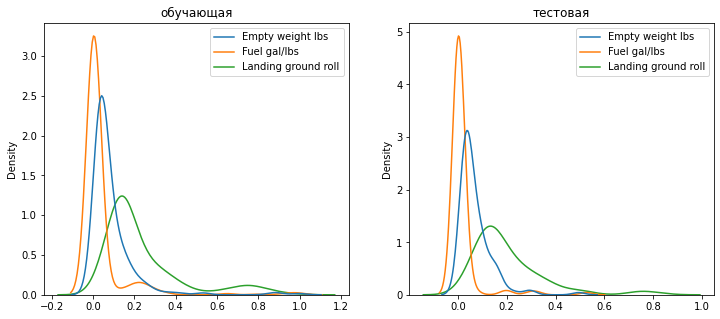

In [ ]:
draw_kde(['Empty weight lbs', 'Fuel gal/lbs', 'Landing ground roll'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

# Обработка выбросов

In [ ]:
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,10))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [ ]:
data_full = data.copy()

In [ ]:
data = data[['Empty weight lbs', 'Fuel gal/lbs', 'Landing ground roll', 'Range N.M.']]

In [ ]:
x_col_list = ['Empty weight lbs', 'Fuel gal/lbs', 'Landing ground roll']

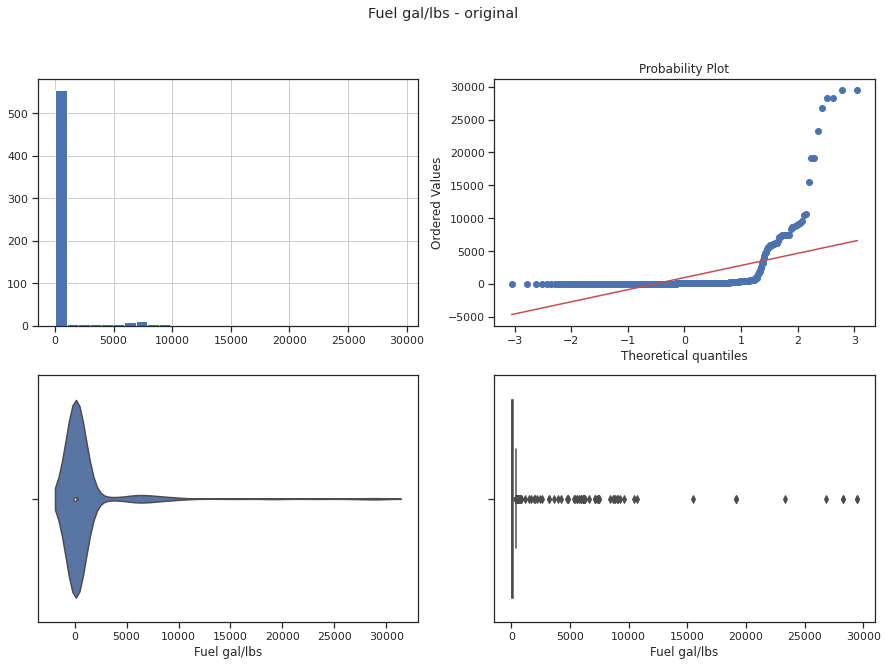

In [ ]:
diagnostic_plots(data, 'Fuel gal/lbs', 'Fuel gal/lbs - original')

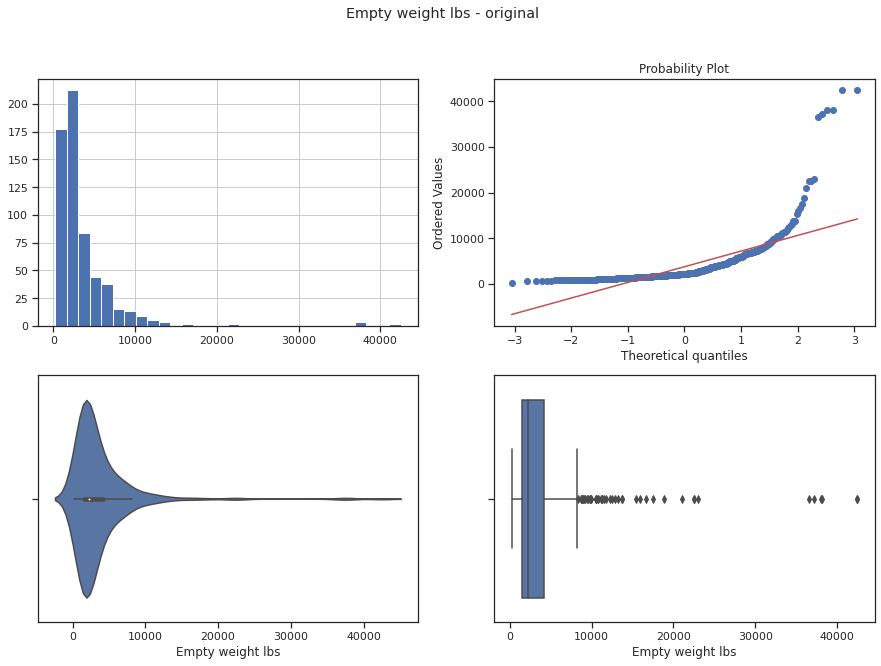

In [ ]:
diagnostic_plots(data, 'Empty weight lbs', 'Empty weight lbs - original')

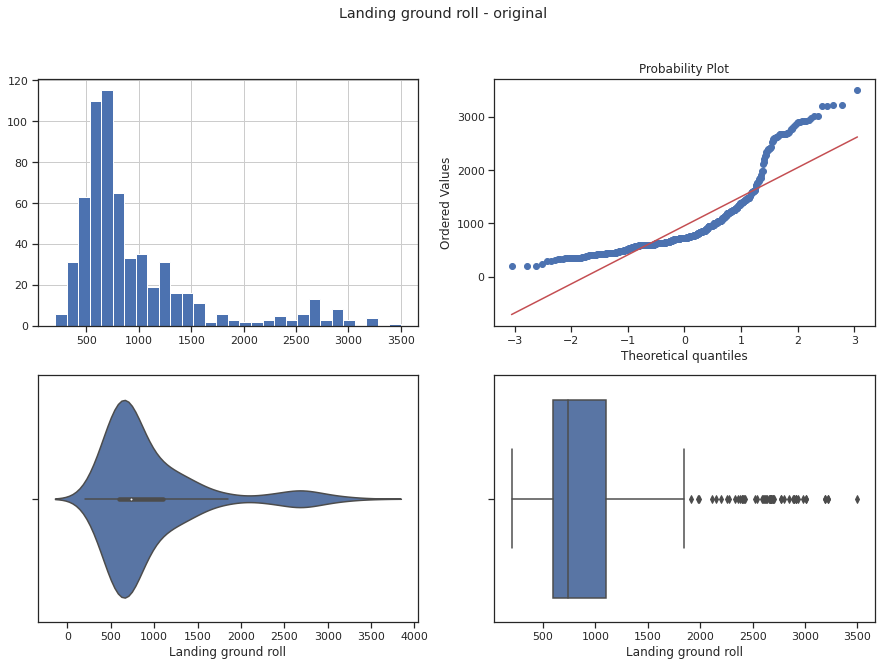

In [ ]:
diagnostic_plots(data, 'Landing ground roll', 'Landing ground roll - original')

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

## Удаление выбросов

In [ ]:
data.shape

(615, 4)

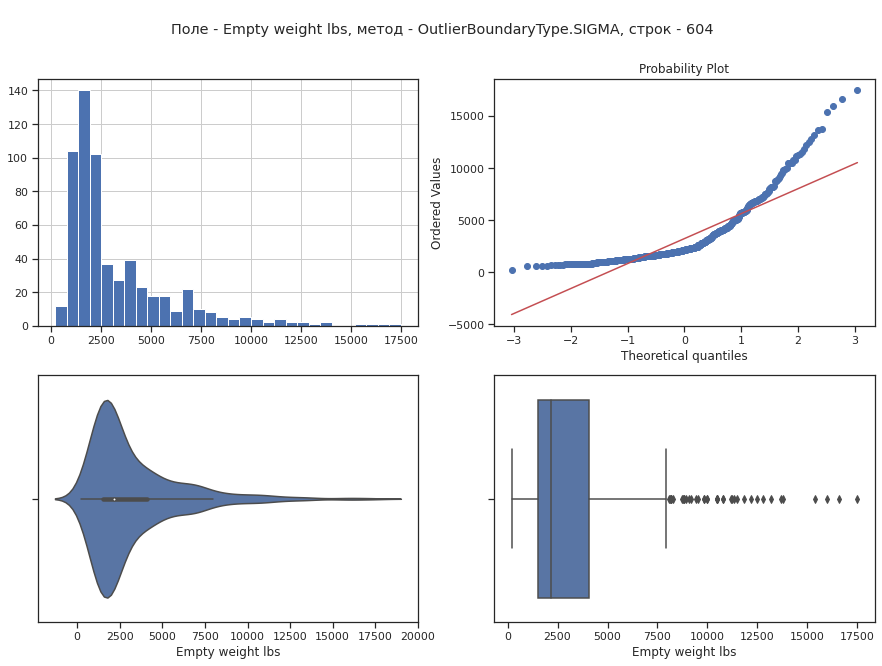

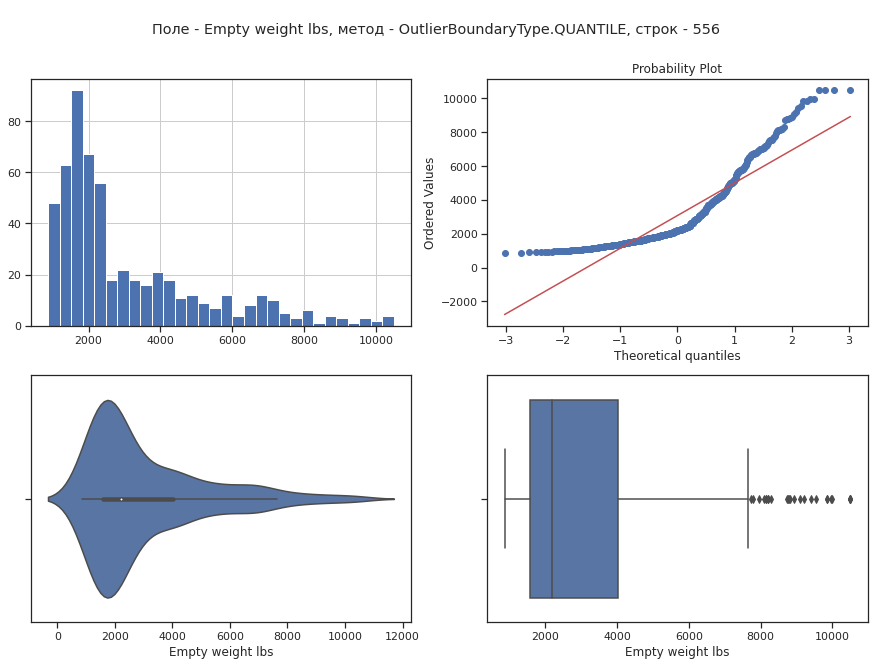

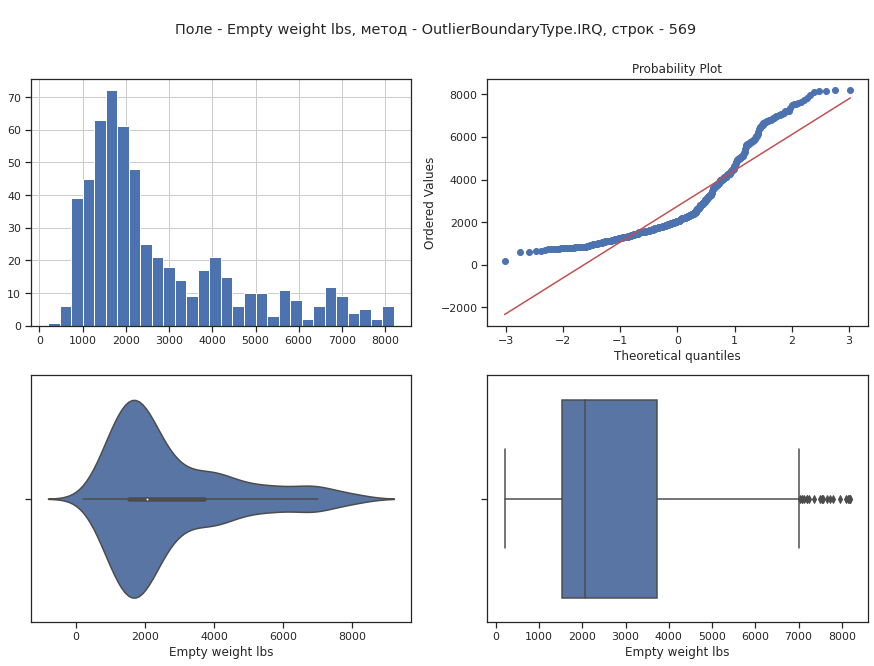

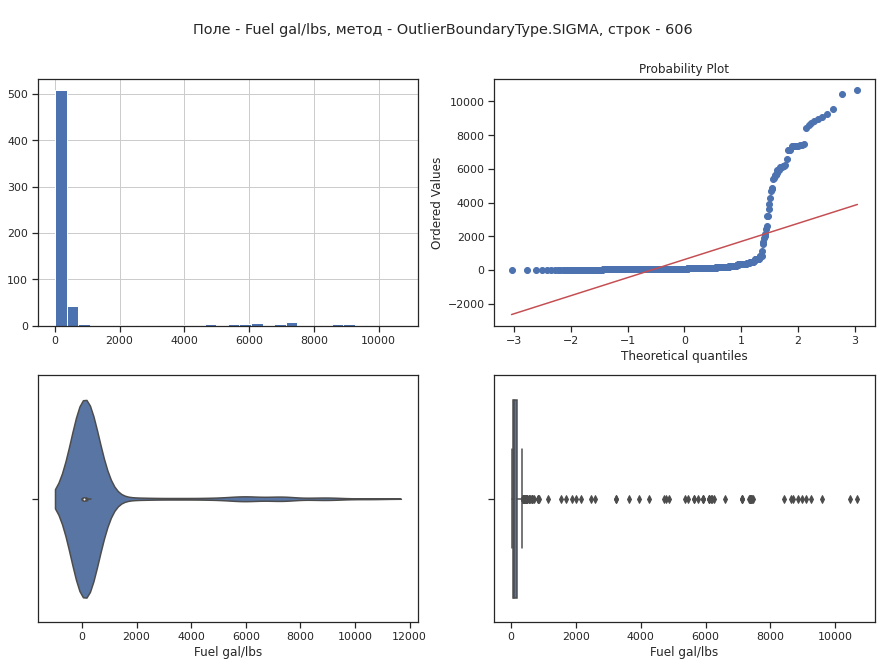

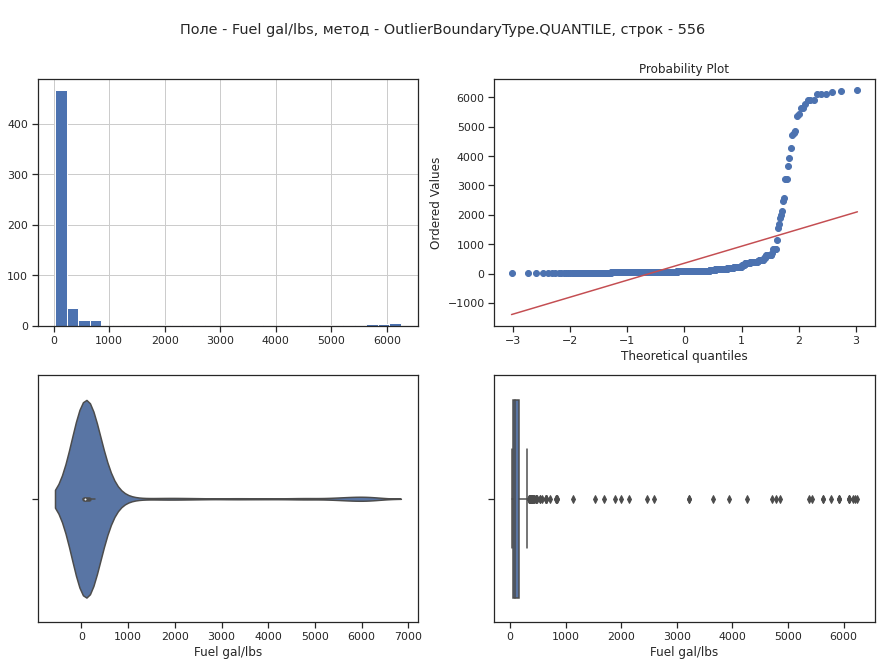

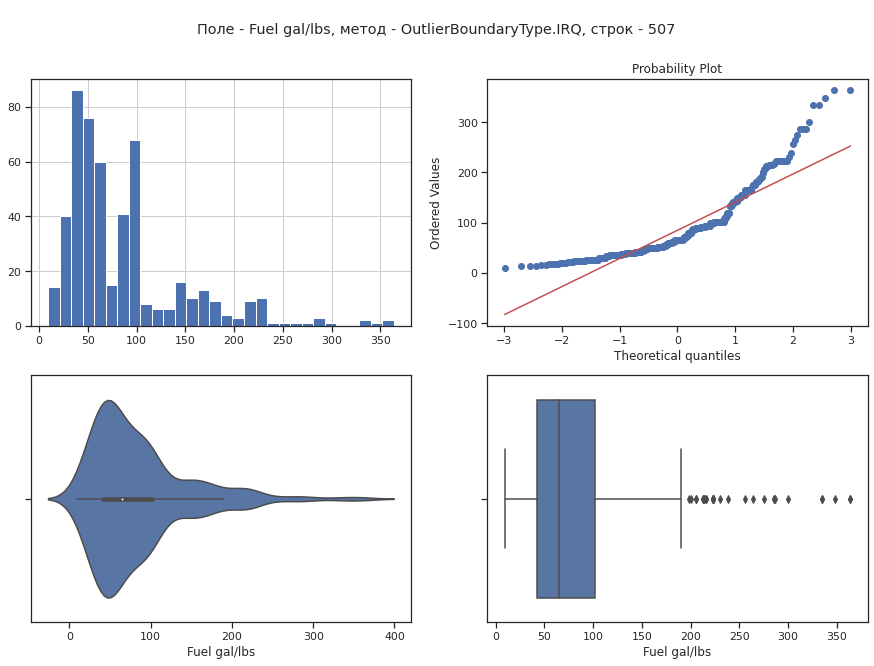

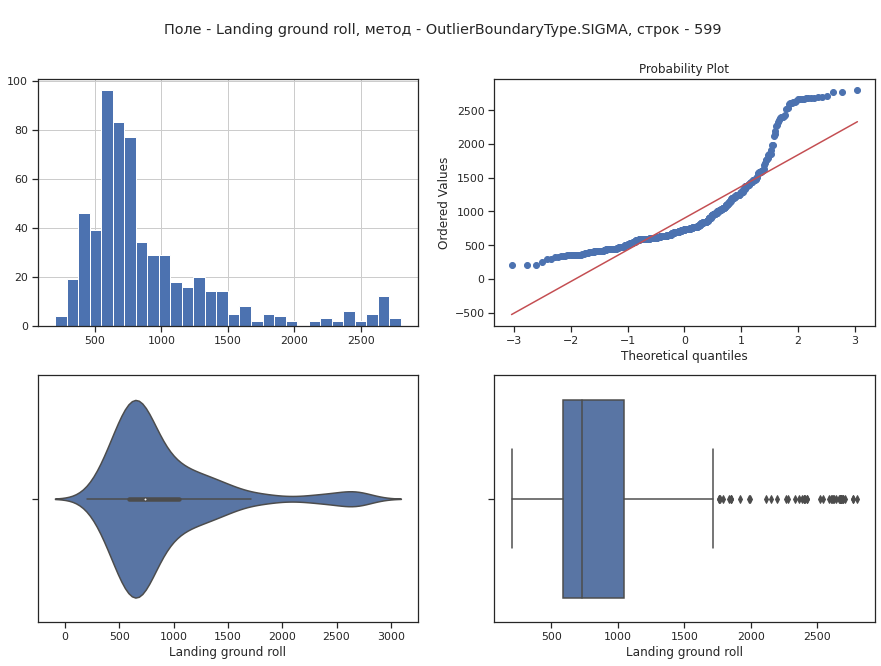

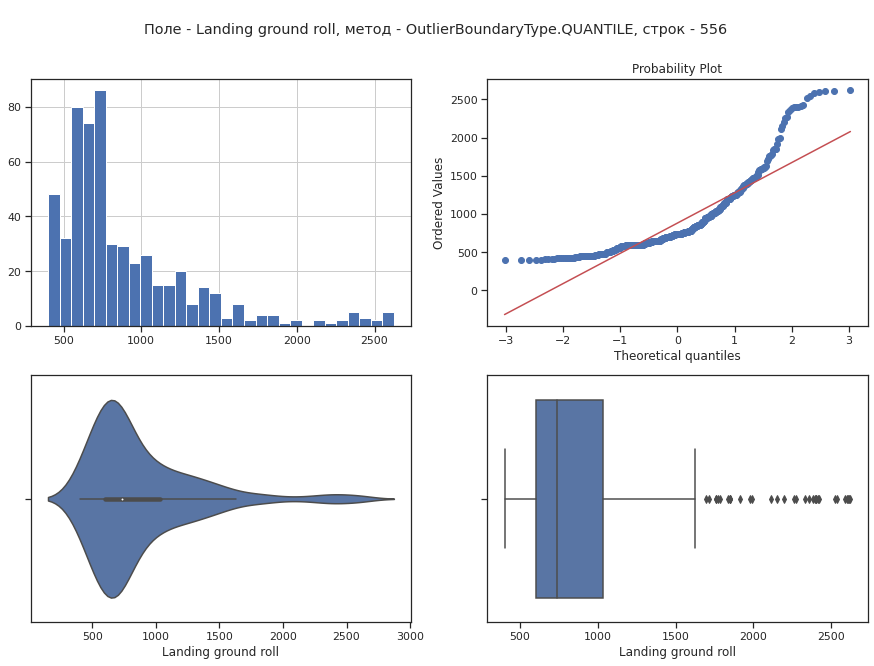

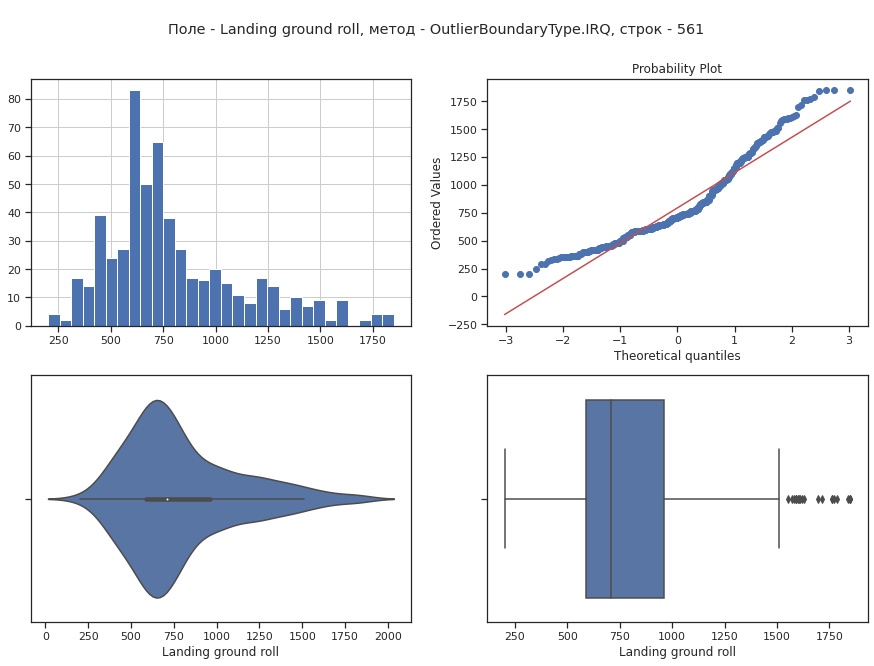

In [ ]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = '\nПоле - {}, метод - {}, строк - {}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

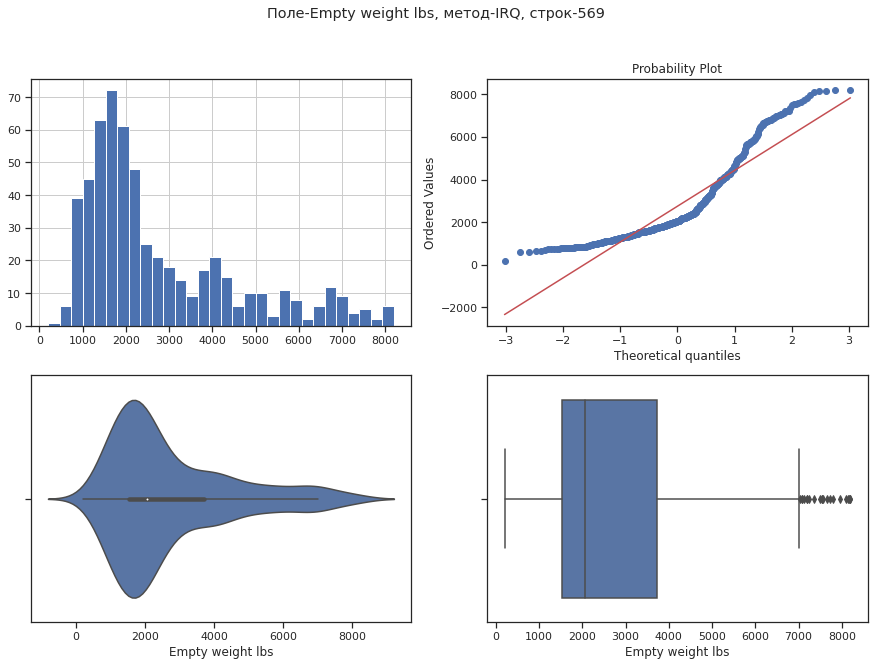

In [ ]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data, "Empty weight lbs", OutlierBoundaryType.IRQ)
# Флаги для удаления выбросов
outliers_temp = np.where(data["Empty weight lbs"] > upper_boundary, True, 
                         np.where(data["Empty weight lbs"] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format("Empty weight lbs", "IRQ", data_trimmed.shape[0])
diagnostic_plots(data_trimmed, "Empty weight lbs", title)

## Замена выбросов

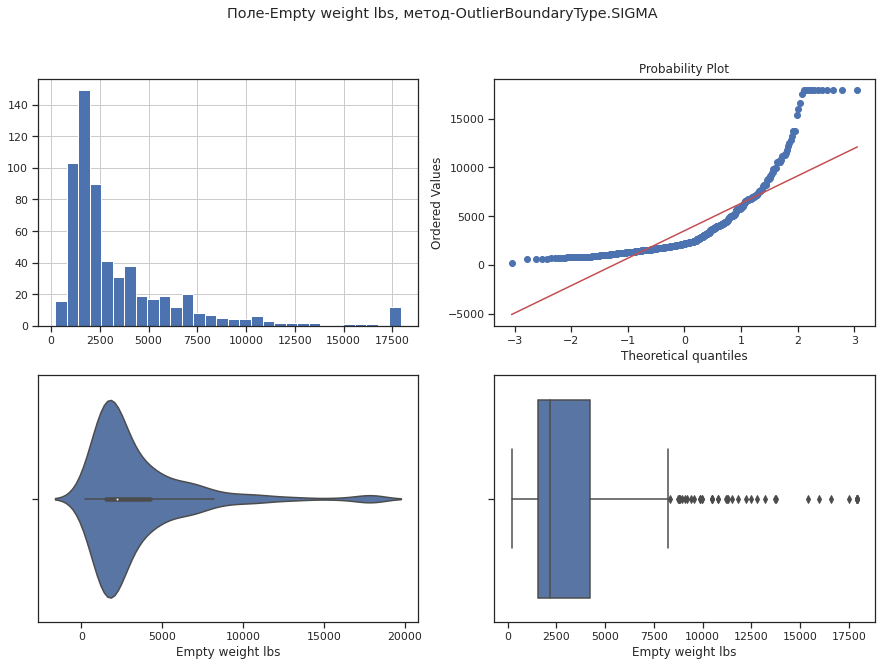

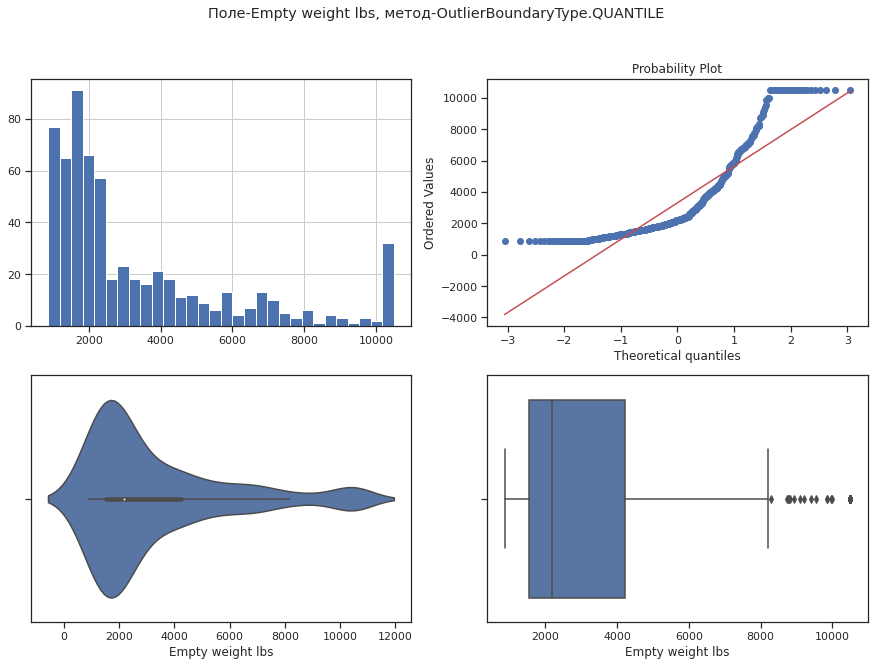

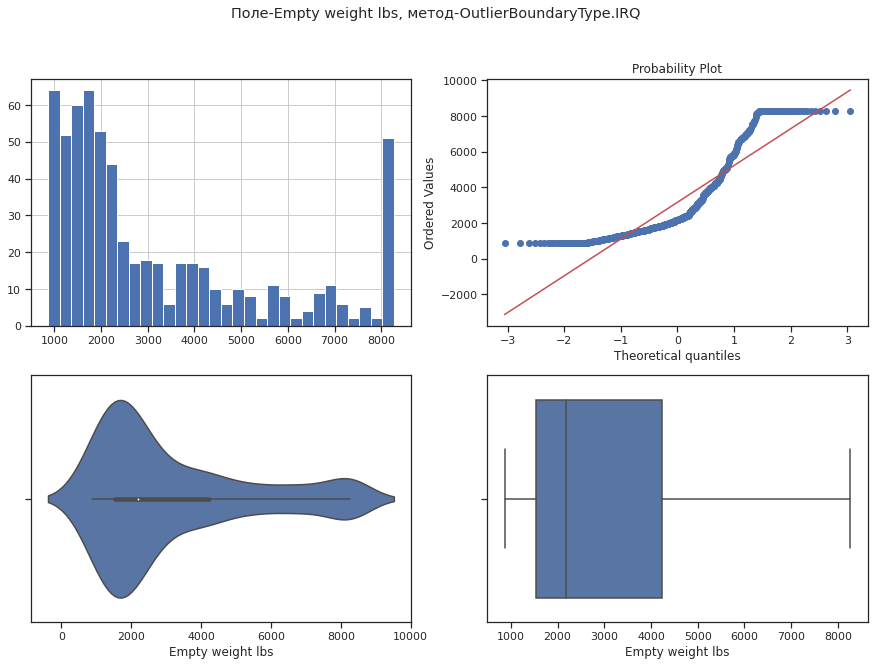

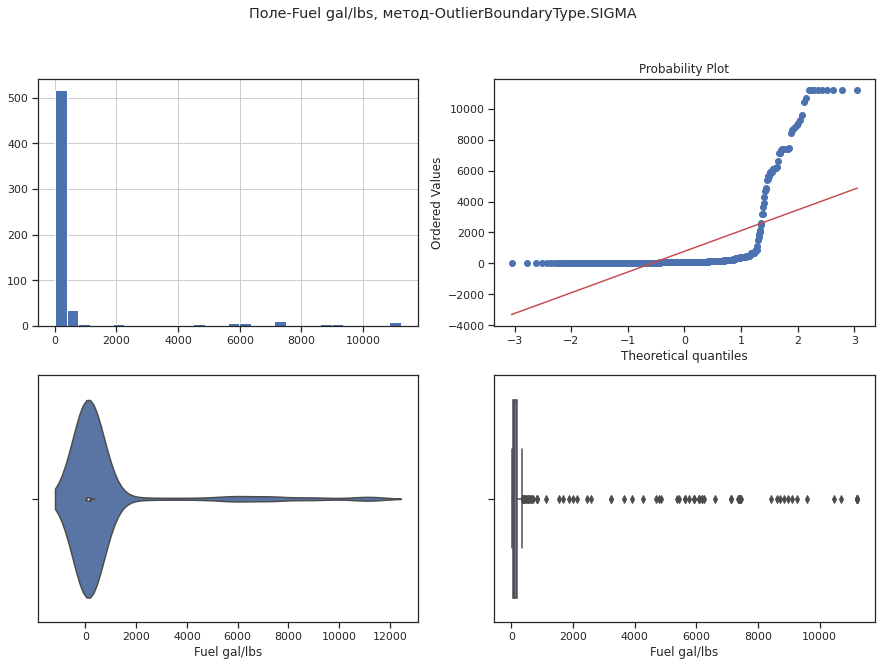

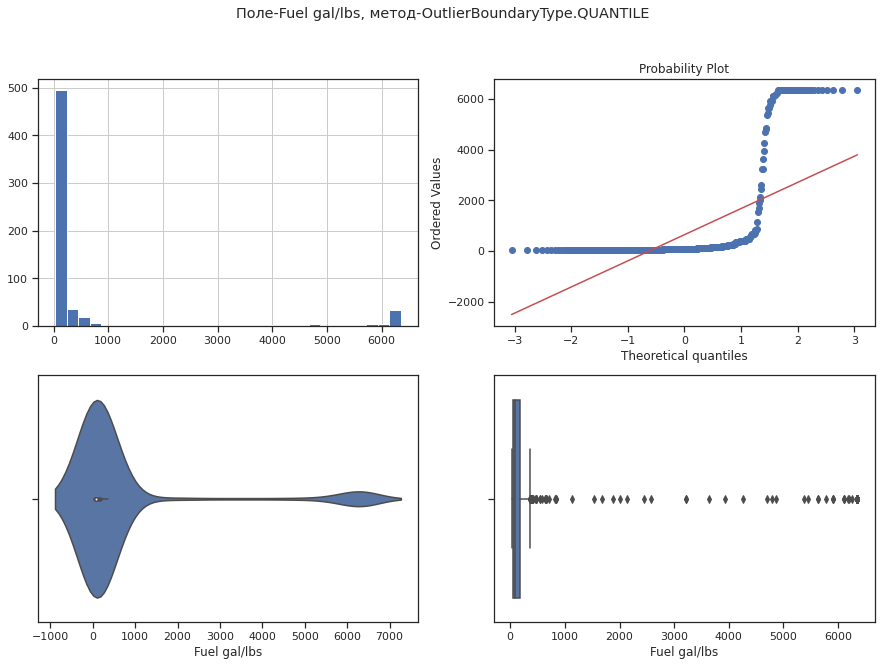

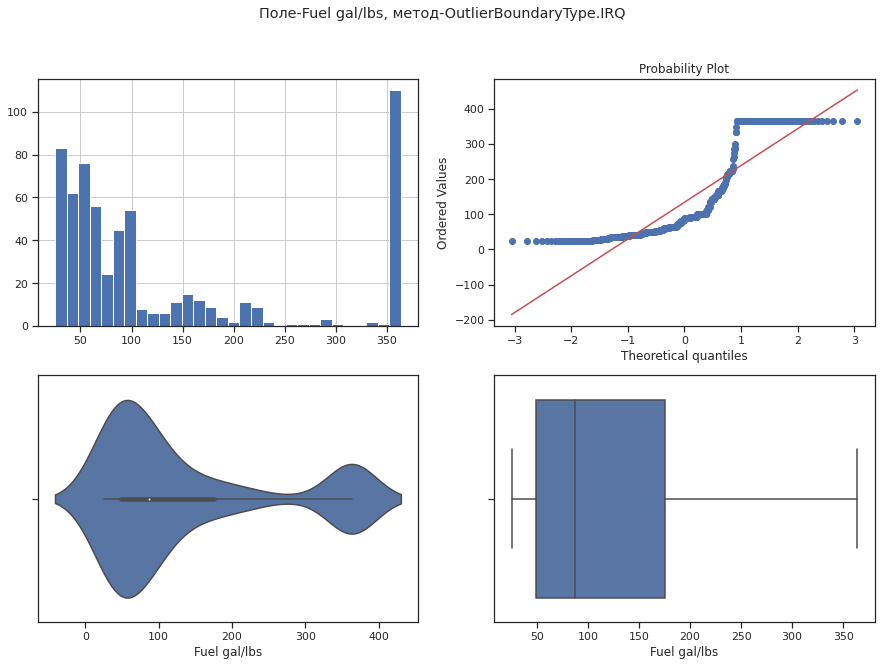

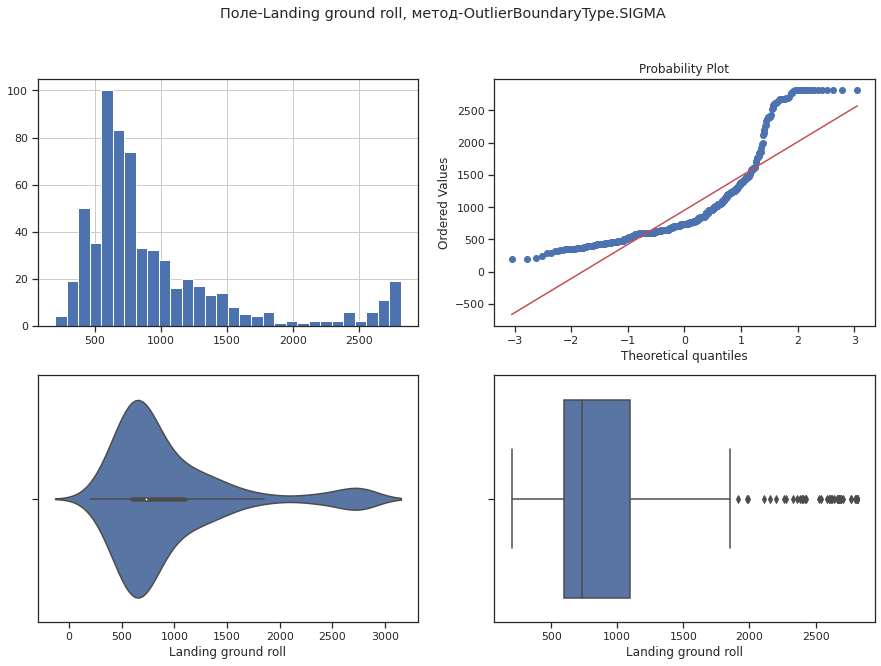

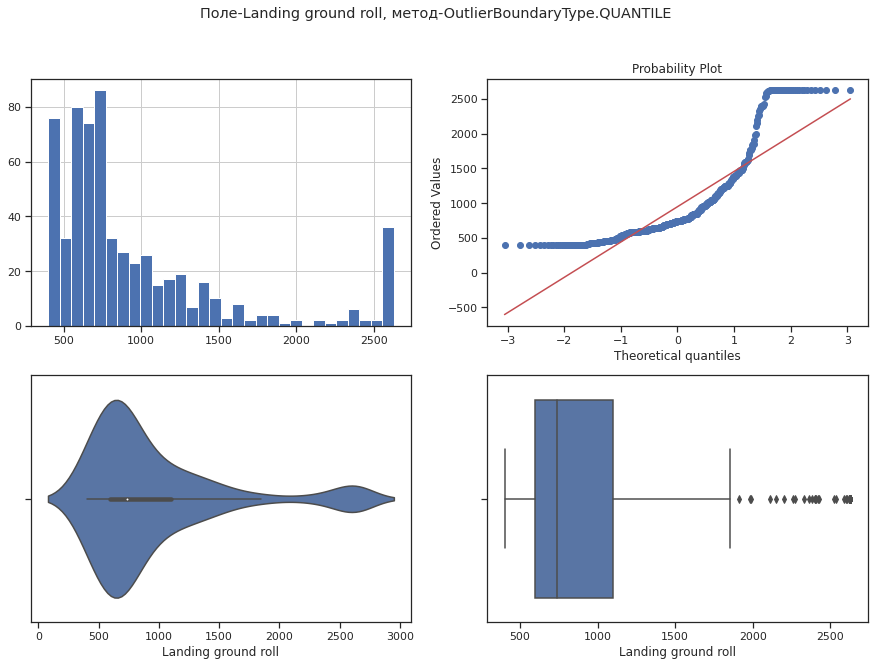

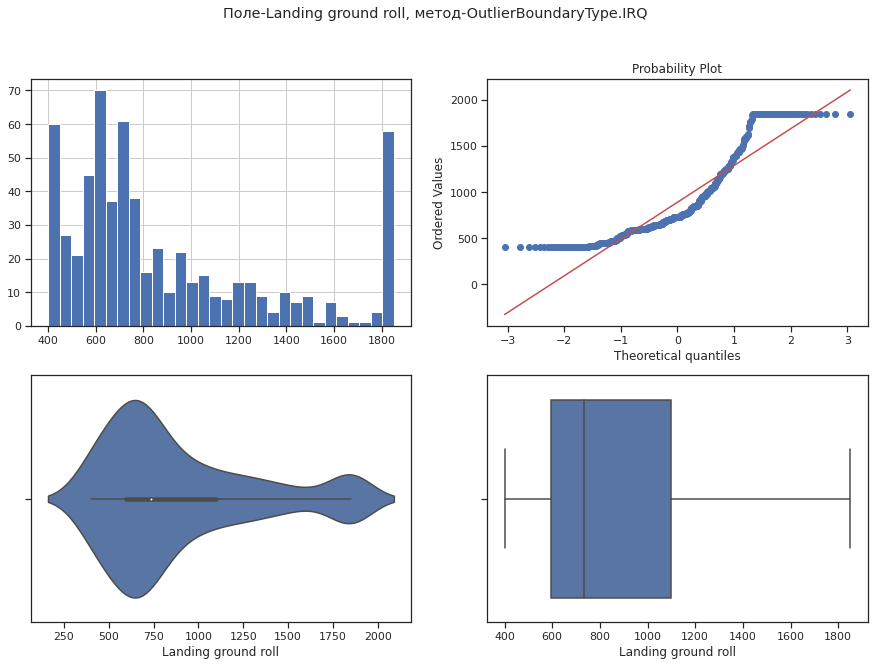

In [ ]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

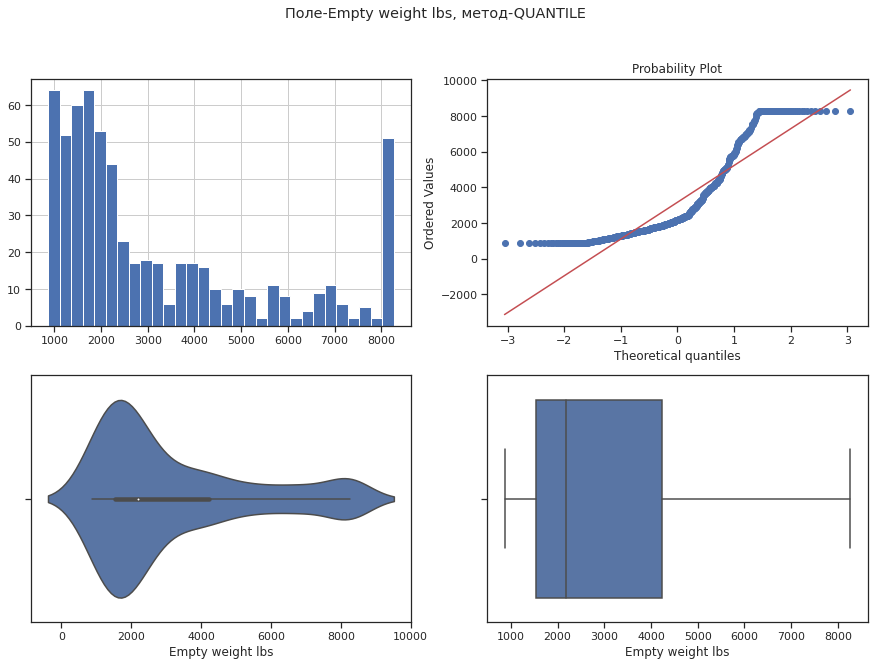

In [ ]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data, "Empty weight lbs",  OutlierBoundaryType.IRQ)
# Изменение данных
data["Empty weight lbs"] = np.where(data["Empty weight lbs"] > upper_boundary, upper_boundary,
                     np.where(data["Empty weight lbs"] < lower_boundary, lower_boundary, data["Empty weight lbs"]))
title = 'Поле-{}, метод-{}'.format("Empty weight lbs", "QUANTILE")
diagnostic_plots(data, "Empty weight lbs", title)

# Обработка нестандратного признака

In [ ]:
house_data = pd.read_csv('/content/drive/MyDrive/datasets/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_data['dt'] = house_data.apply(lambda x: pd.to_datetime(x["date"], format='%Y%m%dT%H%M%S'), axis=1)

In [ ]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dt
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  object        
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
# День
house_data['dt_Day'] = house_data['dt'].dt.day
# Месяц
house_data['dt_Month'] = house_data['dt'].dt.month
# Год
house_data['dt_Year'] = house_data['dt'].dt.year

In [ ]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dt,dt_Day,dt_Month,dt_Year
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014-10-13,13,10,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,9,12,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015-02-25,25,2,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014-12-09,9,12,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015-02-18,18,2,2015


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  object        
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

# Отбор признаков

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/cleaned_data_airplanes.csv')
data = data.drop(['Range N.M._log', 'Range N.M._reciprocal',
       'Range N.M._sqr', 'Range N.M._exp1', 'Range N.M._exp2',
       'Range N.M._exp3', 'Range N.M._exp4', 'Range N.M._boxcox', 'row_num'], axis = 1)

In [ ]:
data.head()

,Model,Company,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,All eng rate of climb,Gross weight lbs,Empty weight lbs,Length ft/in,Height ft/in,Wing span ft/in,Range N.M.,Fuel gal/lbs,All eng service ceiling,Takeoff over 50ft,Takeoff ground run,Landing over 50ft,Landing ground roll
0,15 AC Sedan,Aeronca,Piston,145,104,91.0,46.0,450,2050,1180.0,25/3,10/3,37/5,370.0,36.0,13000.0,900.0,1013.678850,1300.0,572.706741
1,11 CC Super Chief,Aeronca,Piston,85,89,83.0,44.0,600,1350,820.0,20/7,8/9,36/1,190.0,15.0,12300.0,720.0,907.323545,800.0,537.637167
2,7 CCM Champ,Aeronca,Piston,90,90,78.0,37.0,650,1300,810.0,21/5,8/7,35/0,210.0,19.0,16000.0,475.0,1071.689468,850.0,634.209014
3,7 DC Champ,Aeronca,Piston,85,88,78.0,37.0,620,1300,800.0,21/5,8/7,35/0,210.0,19.0,13000.0,500.0,1060.980507,850.0,672.914759
4,7 AC Champ,Aeronca,Piston,65,83,74.0,33.0,370,1220,740.0,21/5,8/9,35/0,175.0,14.0,12500.0,632.0,990.702907,885.0,565.608815


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    615 non-null    object 
 1   Company                  615 non-null    object 
 2   Engine Type              615 non-null    object 
 3   HP or lbs thr ea engine  615 non-null    object 
 4   Max speed Knots          615 non-null    object 
 5   Rcmnd cruise Knots       615 non-null    float64
 6   Stall Knots dirty        615 non-null    float64
 7   All eng rate of climb    615 non-null    object 
 8   Gross weight lbs         615 non-null    object 
 9   Empty weight lbs         615 non-null    float64
 10  Length ft/in             615 non-null    object 
 11  Height ft/in             615 non-null    object 
 12  Wing span ft/in          615 non-null    object 
 13  Range N.M.               615 non-null    float64
 14  Fuel gal/lbs             6

## Метод фильтрации

### Корреляция

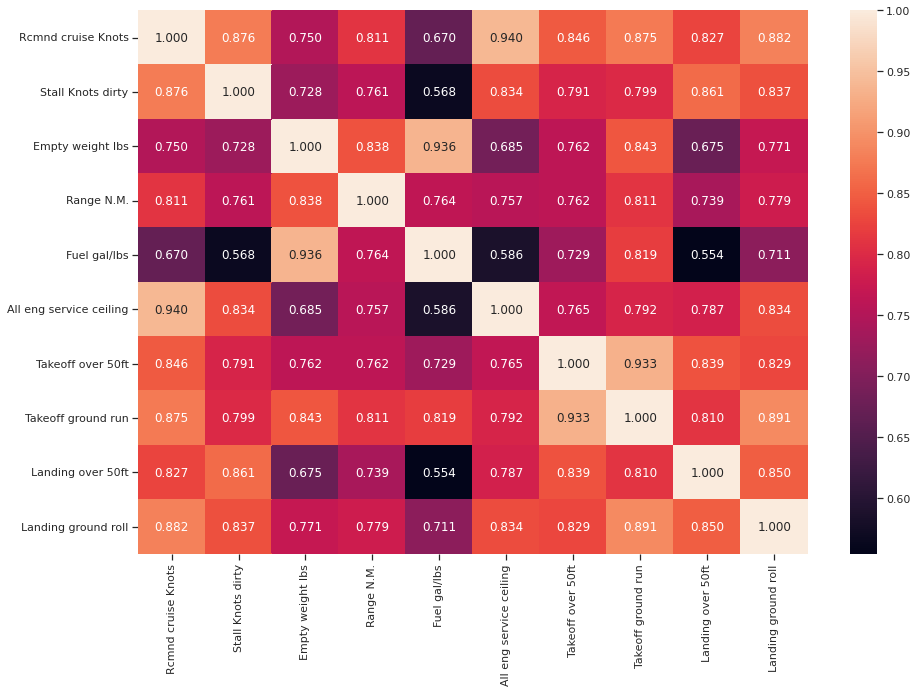

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [ ]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [ ]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [ ]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['All eng service ceiling',
  'Landing ground roll',
  'Stall Knots dirty',
  'Takeoff ground run',
  'Takeoff over 50ft',
  'Landing over 50ft',
  'Range N.M.',
  'Rcmnd cruise Knots'],
 ['Empty weight lbs', 'Takeoff ground run', 'Fuel gal/lbs']]

In [ ]:
cols_to_delete = ['All eng service ceiling',
                  'Landing ground roll',
                  'Stall Knots dirty',
                  'Takeoff ground run',
                  'Takeoff over 50ft',
                  'Landing over 50ft',
                  'Empty weight lbs', 
                  'Takeoff ground run']

In [ ]:
data_less_corr = data.drop(cols_to_delete, axis = 1)

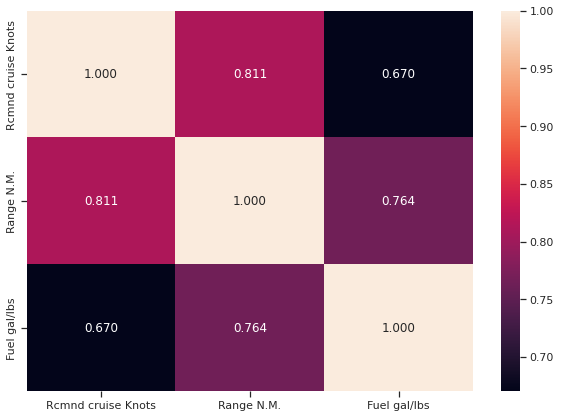

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(data_less_corr.corr(), annot=True, fmt='.3f')

### SelectKBest - К лучших признаков

In [ ]:
num_data = data.select_dtypes(include=[np.number])
data_X = num_data.drop('Range N.M.', axis = 1)
features = data_X.columns
data_Y = num_data['Range N.M.']

Text(0, 0.5, 'Взаимная информация')

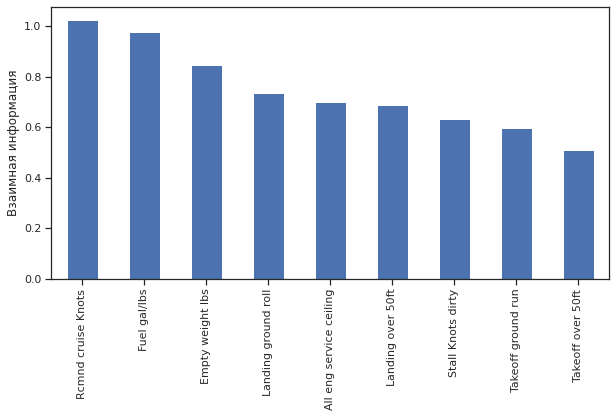

In [ ]:
mi = mutual_info_regression(data_X, data_Y)
mi = pd.Series(mi)
mi.index = features
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [ ]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(data_X, data_Y)

list(zip(features, sel_mi.get_support()))

[('Rcmnd cruise Knots', True),
 ('Stall Knots dirty', False),
 ('Empty weight lbs', True),
 ('Fuel gal/lbs', True),
 ('All eng service ceiling', True),
 ('Takeoff over 50ft', False),
 ('Takeoff ground run', False),
 ('Landing over 50ft', False),
 ('Landing ground roll', True)]

In [ ]:
features[sel_mi.get_support()]

Index(['Rcmnd cruise Knots', 'Empty weight lbs', 'Fuel gal/lbs',
       'All eng service ceiling', 'Landing ground roll'],
      dtype='object')

## Метод обертывания

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='r2',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data_X, data_Y, custom_feature_names=features)

print('\nBest r2 score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 246/246


Best r2 score: 0.68
Best subset (indices): (2, 3, 4, 7)
Best subset (corresponding names): ('Empty weight lbs', 'Fuel gal/lbs', 'All eng service ceiling', 'Landing over 50ft')


In [ ]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='r2',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(data_X, data_Y, custom_feature_names=features)

print('\nBest r2 score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 45/45


Best r2 score: 0.66
Best subset (indices): (2, 4)
Best subset (corresponding names): ('Empty weight lbs', 'All eng service ceiling')


## Метод вложений

In [ ]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(data_X, data_Y)
# Коэффициенты регрессии
list(zip(features, e_ls1.coef_))

[('Rcmnd cruise Knots', 2.0238049277758137),
 ('Stall Knots dirty', -0.4151799994123253),
 ('Empty weight lbs', 0.06107576466631432),
 ('Fuel gal/lbs', 0.005924767314763371),
 ('All eng service ceiling', 0.002073886142693123),
 ('Takeoff over 50ft', -0.024019263506049153),
 ('Takeoff ground run', 0.0027320823774243394),
 ('Landing over 50ft', 0.15394337995112253),
 ('Landing ground roll', -0.05141196313732647)]

In [ ]:
# Все признаки можно оставить
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(data_X, data_Y)
list(zip(features, sel_e_ls1.get_support()))

[('Rcmnd cruise Knots', True),
 ('Stall Knots dirty', True),
 ('Empty weight lbs', True),
 ('Fuel gal/lbs', True),
 ('All eng service ceiling', True),
 ('Takeoff over 50ft', True),
 ('Takeoff ground run', True),
 ('Landing over 50ft', True),
 ('Landing ground roll', True)]